In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score

In [2]:
data = pd.read_csv("C:/dsda/archive/whole data.csv")
data

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [3]:
data.shape

(4410, 29)

In [4]:
data=data.dropna()

In [5]:
data.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [6]:
data.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,2.728837,3.153953,2.723953,2.724884,2.761163,36.926977,9.197907,2.913256,1.0,...,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558
std,1272.117692,0.710769,0.360946,1.093802,1.101875,0.707800,9.146517,8.097059,1.024774,0.0,...,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.750000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,...,29260.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2215.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,...,49360.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3314.250000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,...,83802.500000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4409.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   float64
 4   JobSatisfaction          4300 non-null   float64
 5   WorkLifeBalance          4300 non-null   float64
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   object 
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  EmployeeCount            4300 non-null   int64  
 14  Gender                  

In [8]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0],str):
        data[i] = encoder.fit_transform(data[i])

In [9]:
data

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1.0,0,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,4.0,0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,2,2,...,1.0,0,18,8,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,2,1,...,3.0,0,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,2,1,...,2.0,0,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,2,1,...,0.0,0,20,8,0,5.0,4,4,1,2


In [10]:
data.Attrition.value_counts()

0    3605
1     695
Name: Attrition, dtype: int64

In [11]:
X = data.drop(['Attrition'], axis=1)
y =data.Attrition

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state = 4589)

In [15]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

In [16]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.8502906976744186

In [17]:
pred = lr.predict(x_test)

In [18]:
accuracy_score(y_test, pred)


0.8639534883720931

In [19]:
f1_score(y_test, pred)

0.21476510067114096

In [20]:
recall_score(y_test,pred)

0.13008130081300814

In [21]:
data.reset_index(inplace=True)
li = list(data[data.Attrition == 0].sample(n=2910).index)
data = data.drop(data.index[li])

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state = 489)

In [23]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

In [24]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.852906976744186

In [25]:
y_pred = lr.predict(x_test)

In [26]:
lr.score(x_test, y_test)

0.8441860465116279

In [27]:
accuracy_score(y_test, y_pred)

0.8441860465116279

In [28]:
recall_score(y_test,y_pred)

0.11428571428571428

In [29]:
f1_score(y_test,y_pred)

0.19277108433734938

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
Scaler_X = StandardScaler()
scaled_X = Scaler_X.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy='auto')

In [33]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [34]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = lr.predict(X_test)

In [35]:
accuracy_score(y_test, smote_pred)

0.6818604651162791

In [36]:
f1_score(y_test, smote_pred)


0.4

In [37]:
recall_score(y_test, smote_pred)

0.6298342541436464

In [38]:
feature_names = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature_names'], data = feature_names)
summary_table['coeff']= np.transpose(lr.coef_)
summary_table

summary_table.index = summary_table.index +1
summary_table.iloc[0]= ['Intercept', lr.intercept_[0]]

summary_table.sort_index()

,Feature_names,coeff
1,Intercept,-0.482274
2,JobInvolvement,0.048510
3,PerformanceRating,0.096191
4,EnvironmentSatisfaction,-0.407128
5,JobSatisfaction,-0.331260
6,WorkLifeBalance,-0.140902
7,Age,-0.383611
8,BusinessTravel,-0.012696
9,Department,-0.218573
10,DistanceFromHome,-0.137422


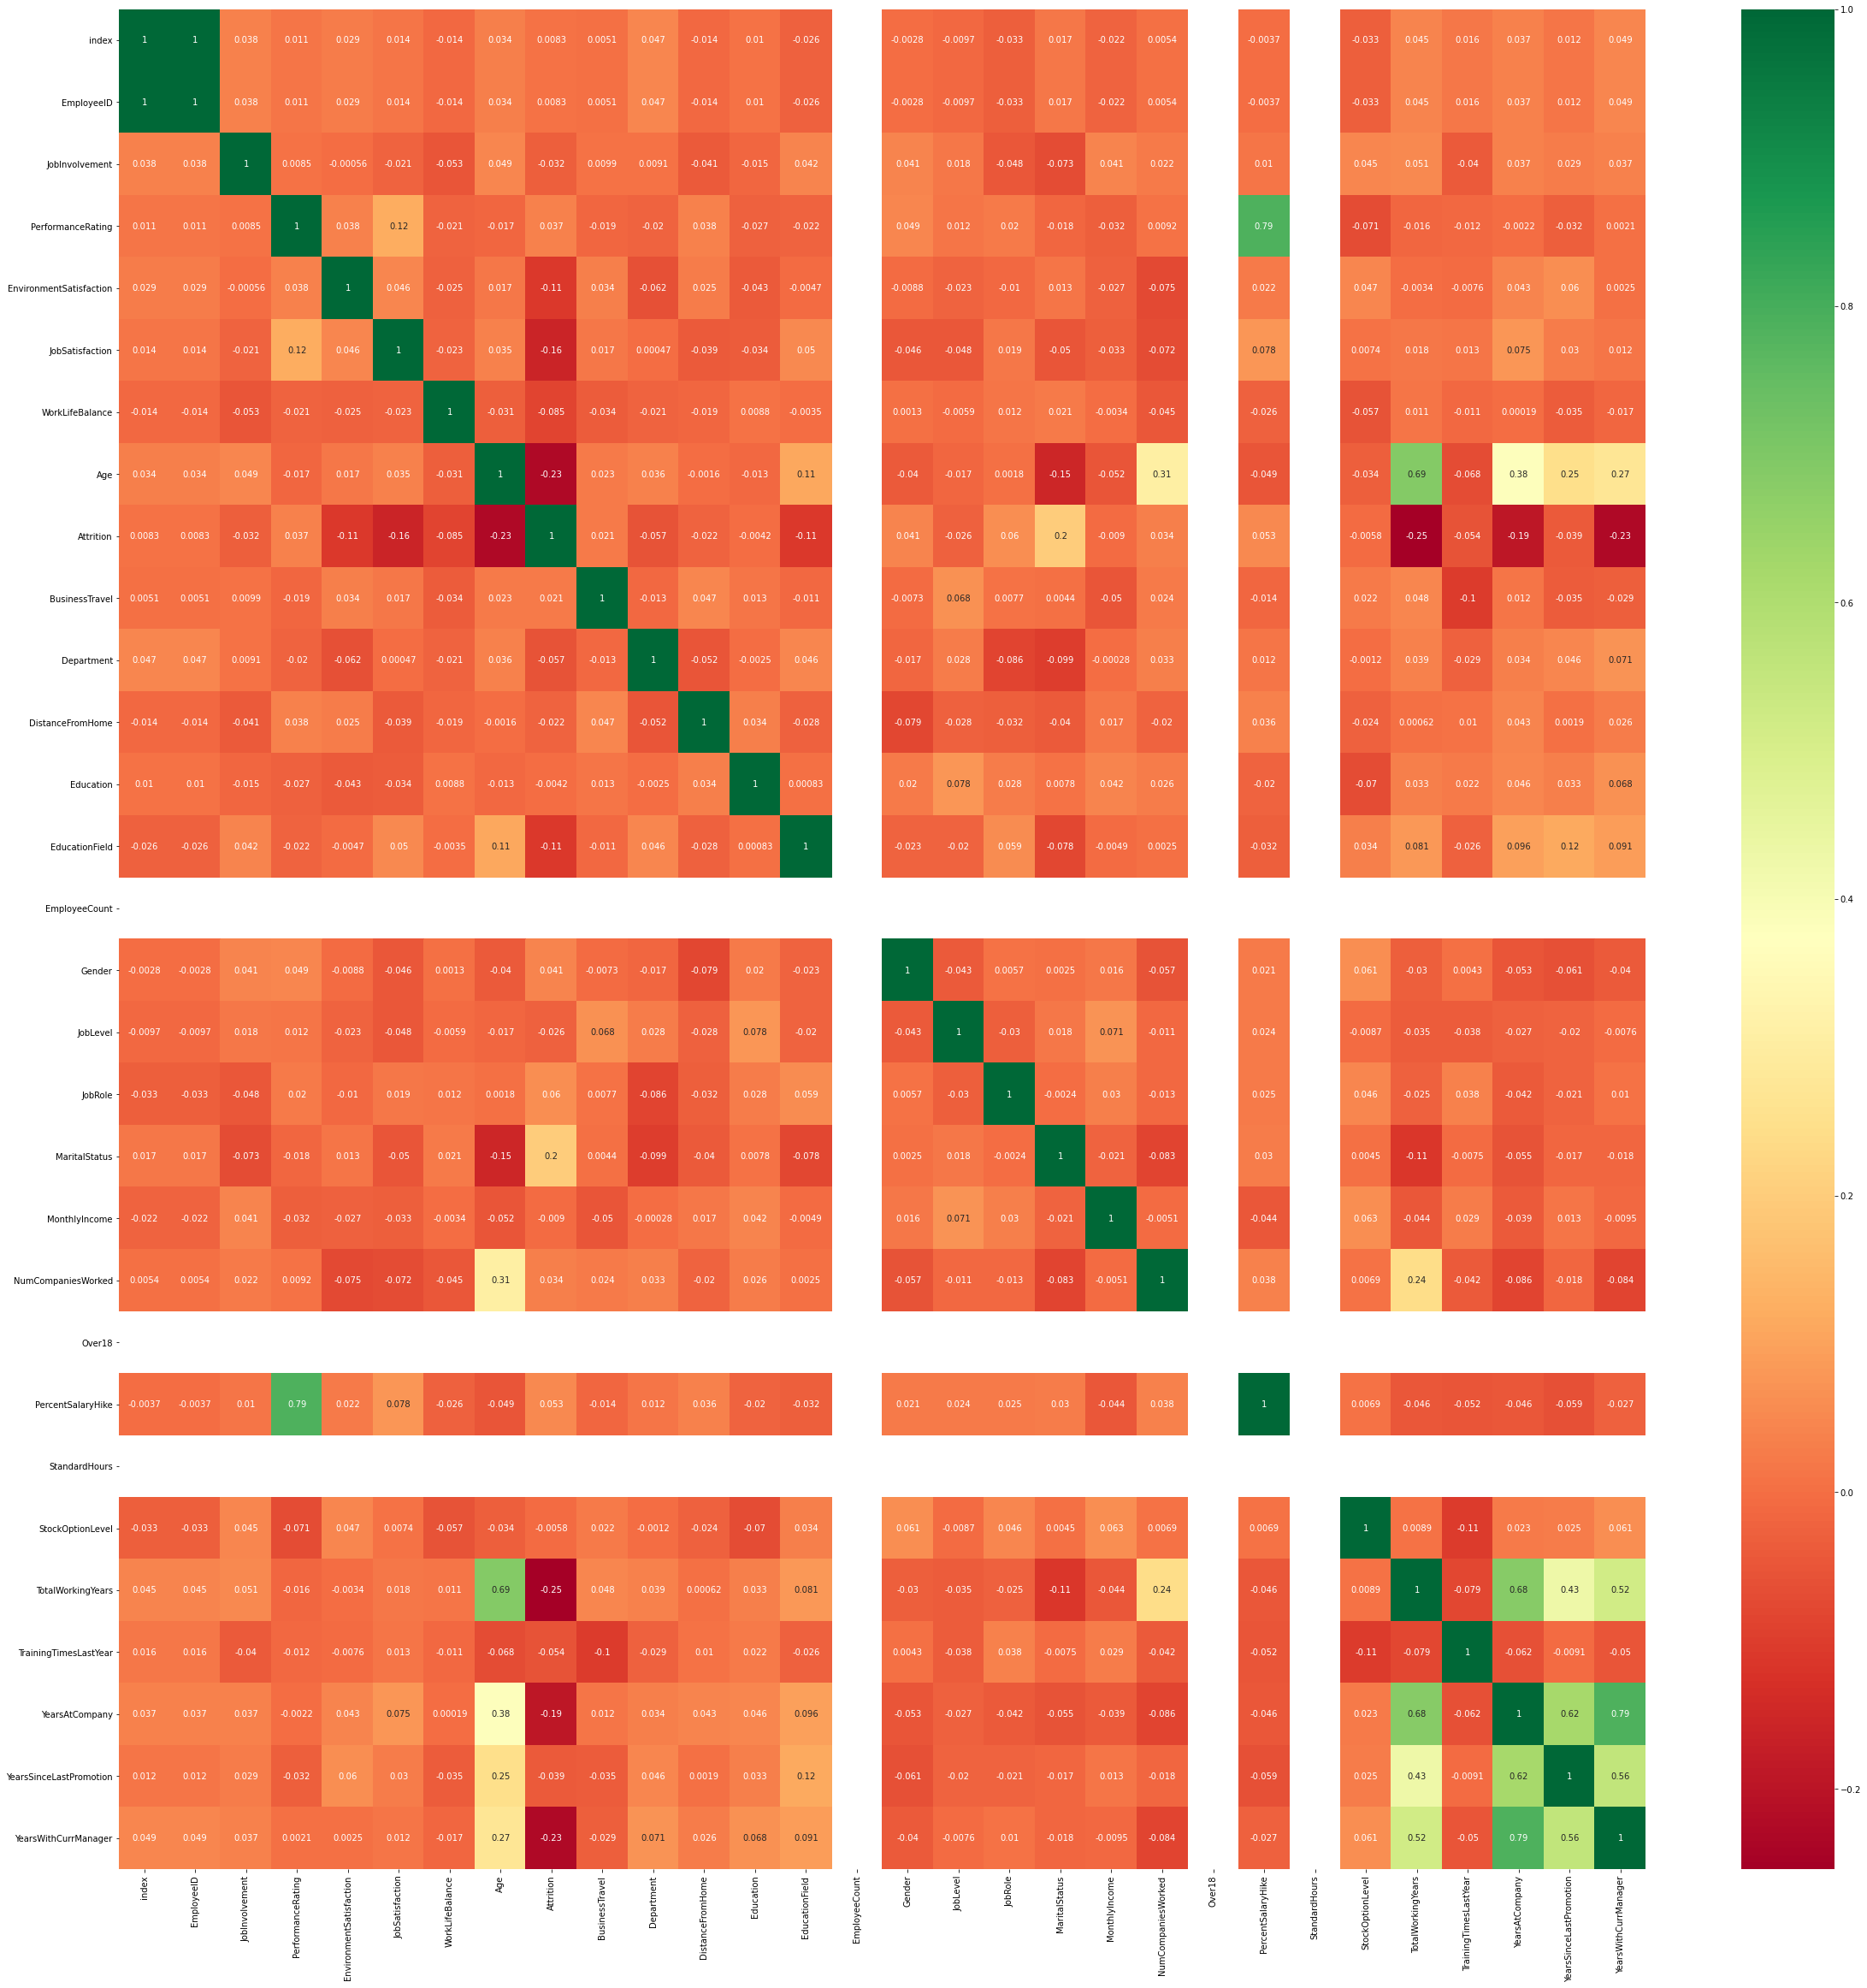

In [40]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
print(data.Over18.value_counts())
print(data.StandardHours.value_counts())
print(data.EmployeeCount.value_counts())

0    1390
Name: Over18, dtype: int64
8    1390
Name: StandardHours, dtype: int64
1    1390
Name: EmployeeCount, dtype: int64


In [43]:
#Dropping them as they are not relevant
data.drop(['StandardHours','EmployeeCount','EmployeeID','Over18'], inplace=True, axis=1)

In [44]:
X = data.drop(['Attrition'], axis=1)
y =data.Attrition

In [45]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif=add_constant(X)

pd.Series([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const                      207.726009
index                        1.013785
JobInvolvement               1.025222
PerformanceRating            2.763395
EnvironmentSatisfaction      1.030430
JobSatisfaction              1.052423
WorkLifeBalance              1.018830
Age                          2.082563
BusinessTravel               1.034709
Department                   1.042179
DistanceFromHome             1.032002
Education                    1.029944
EducationField               1.039936
Gender                       1.034043
JobLevel                     1.030310
JobRole                      1.033094
MaritalStatus                1.059107
MonthlyIncome                1.028452
NumCompaniesWorked           1.277786
PercentSalaryHike            2.745161
StockOptionLevel             1.066009
TotalWorkingYears            3.404875
TrainingTimesLastYear        1.042817
YearsAtCompany               4.376084
YearsSinceLastPromotion      1.694947
YearsWithCurrManager         2.777747
dtype: float

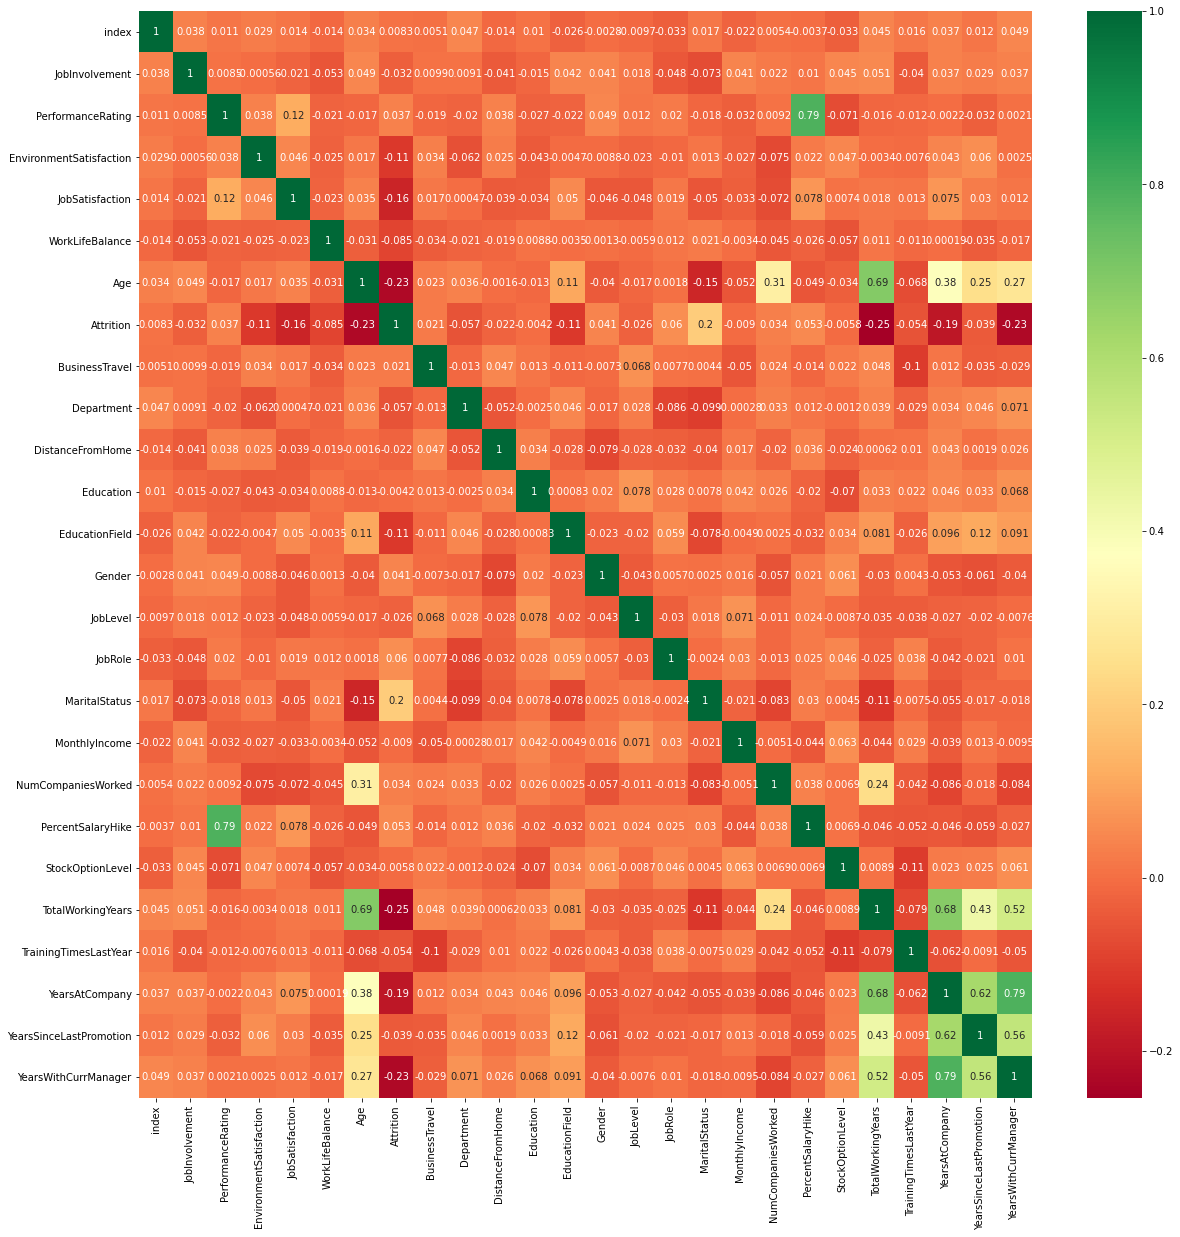

In [47]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
X.drop(['JobInvolvement','Age','BusinessTravel','PerformanceRating','YearsAtCompany','DistanceFromHome', 'StockOptionLevel'], inplace=True, axis=1)

In [49]:
X.drop(['Education','Gender','JobRole','Department'],inplace =True, axis =1)


In [50]:
Scaler_X = StandardScaler()
scaled_X = Scaler_X.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=27)


In [53]:
sm = SMOTE(random_state=27, sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X_train, y_train)

In [54]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = lr.predict(X_test)

In [55]:
accuracy_score(y_test, smote_pred) 

0.6551724137931034

In [56]:
f1_score(y_test, smote_pred)

0.6739130434782609

In [57]:
recall_score(y_test, smote_pred)

0.6850828729281768

In [58]:
feature_names = X.columns.values
summary_table = pd.DataFrame(columns = ['Feature_names'], data = feature_names)
summary_table['coeff']= np.transpose(lr.coef_)
summary_table

summary_table.index = summary_table.index +1
summary_table.iloc[0]= ['Intercept', lr.intercept_[0]]

In [59]:
summary_table.sort_index()

,Feature_names,coeff
1,Intercept,-0.026695
2,EnvironmentSatisfaction,-0.286412
3,JobSatisfaction,-0.396743
4,WorkLifeBalance,-0.212787
5,EducationField,-0.196827
6,JobLevel,-0.142804
7,MaritalStatus,0.445298
8,MonthlyIncome,-0.034959
9,NumCompaniesWorked,0.183767
10,PercentSalaryHike,0.136102
